Minimal reproduction of error

In [1]:
import diffusers

In [3]:
model = diffusers.UNet2DModel(
    sample_size=32,
    in_channels=1,
    out_channels=1,
    layers_per_block=2,
    block_out_channels=(128,128,256,512),
    down_block_types=(
        "DownBlock2D",
        "DownBlock2D",
        "AttnDownBlock2D",
        "DownBlock2D",
    ),
    up_block_types=(
        "UpBlock2D",
        "AttnUpBlock2D",
        "UpBlock2D",
        "UpBlock2D",
    ),
)

In [5]:
noise_scheduler = diffusers.DDPMScheduler(num_train_timesteps=200, tensor_format='pt')

In [6]:
pipeline = diffusers.DDPMPipeline(unet=model,scheduler=noise_scheduler)

In [7]:
pipeline()["sample"]

  0%|          | 0/200 [00:00<?, ?it/s]

TypeError: Cannot handle this data type: (1, 1, 1), |u1

In [8]:
from PIL import Image
import numpy as np

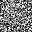

In [9]:
Image.fromarray(np.squeeze((np.random.rand(32,32,1)*255).astype('uint8')))


In [ ]:
#